## The Bootstrap

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
def g(x, mu, sigma): return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x - mu)**2/2/sigma**2)

### The Central Limit Theorem

se estimate: 0.1813
se         : 0.1826


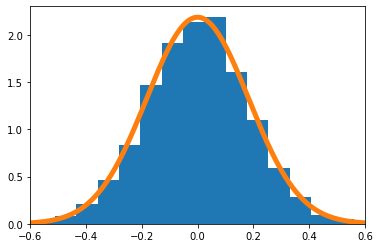

In [134]:
t = np.linspace(-0.6, 0.6, 200)
sample_means = []

for _ in range(10000):
    X = np.random.normal(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = 1/np.sqrt(30)
    
print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means))):.4}")
print(f"se         : {se:.4}")

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 0, se), lw=5)
plt.xlim(-0.6, 0.6);

se estimate: 0.05312
         se: 0.0527


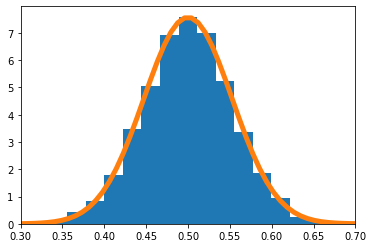

In [133]:
sample_means = []
t = np.linspace(0.3, 0.7)

for _ in range(10000):
    X = np.random.uniform(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = 1/np.sqrt(12*30)

print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means - 0.5))):.4}")
print(f"         se: {se:.4}")

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 0.5, se), lw=5)
plt.xlim(0.3, 0.7);

se estimate: 0.1835
se         : 0.1826


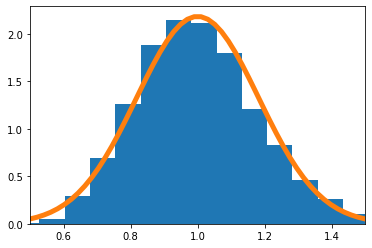

In [132]:
t = np.linspace(0.5, 1.5)
sample_means = []

for _ in range(10000):
    X = np.random.exponential(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = 1/np.sqrt(30)
    
print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means - 1))):.4}")
print(f"se         : {se:.4}")

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 1, se), lw=5)
plt.xlim(0.5, 1.5);

se estimate: 0.08977
se         : 0.08944


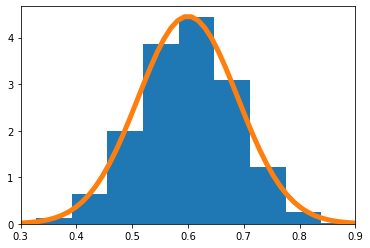

In [135]:
t = np.linspace(0.3, 0.9)
sample_means = []

for _ in range(100000):
    X = np.random.binomial(1, 0.6, size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = np.sqrt(0.6*0.4/30)
    
print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means - 0.6))):.4}")
print(f"se         : {se:.4}")

plt.hist(sample_means, bins=12, density=True);
plt.plot(t, g(t, 0.6, se), lw=5)
plt.xlim(0.3, 0.9);

Above, we estimated the standard error of the mean by repeatedly sampling from a **known population distribution** in order to generate a random sample from the **sampling distribution of the mean**. This approach can't work in practice because we don't know the population distribution! How do we estimate the standard error of the mean in the absence of this knowledge?

Approximate the population distribution as well as we can using only our data set.

Given data $D=\{x_1,\ldots,x_n\}$ drawn from an unknown distribution $P$, define the **empirical distribution of $D$** to be the discrete distribution over $D$ defined by

$$
\widehat P(x) = \frac{\#\{i : x_i=x\}}{n}.
$$

Let $X$ represent the result of a sequence of 100 flips of a coin, each flip having probability $p$ of coming up heads.

In [157]:
np.random.seed(666)
X = 1*(np.random.uniform(size=30) < 0.6)
print(X.astype(int))

[0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1]


In [243]:
b_means = []

for _ in range(100000):
    I = np.random.randint(30, size=30)
    b_means.append(X[I].mean())

In [244]:
np.std(b_means)

0.0880160321860613

In [242]:
np.sqrt(0.6*0.4/30)

0.08944271909999159

In [224]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype='l')

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k

2